# Customer Satisfaction Analysis

**Objective:**
We shall be analysing customer satisfaction by using their review score as a metric of satisfaction.

**Dataset:**
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download

>Brazilian E-Commerce Public Dataset by Olist
>Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.
>This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.


## Importing the files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("datasets/olist_customers_dataset.csv")
geoloc = pd.read_csv("datasets/olist_geolocation_dataset.csv")
order_reviews = pd.read_csv("datasets/olist_order_reviews_dataset.csv")
order_items = pd.read_csv("datasets/olist_order_items_dataset.csv")
order_payments = pd.read_csv("datasets/olist_order_payments_dataset.csv")
orders = pd.read_csv("datasets/olist_orders_dataset.csv")
products = pd.read_csv("datasets/olist_products_dataset.csv")
sellers = pd.read_csv("datasets/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("datasets/product_category_name_translation.csv")

## Relationship Between The Tables
![relationship-between-tables.png](datasets/relationship-between-tables.png)

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geoloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Data Cleaning

### Handling Missing Value

In [13]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
geoloc.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [15]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [16]:
# Since these two have missing values
del order_reviews['review_comment_title']
del order_reviews['review_comment_message']

In [17]:
order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [18]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [20]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
del orders['order_approved_at']
del orders['order_delivered_carrier_date']
del orders['order_delivered_customer_date']
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

In [22]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
# Replacng missing categories with "Unknown"
products['product_category_name'].replace(np.nan,'Unknown',inplace=True)

In [24]:
# To only keep product_id and product_category_name columns
products=products[['product_id','product_category_name']].copy()

In [25]:
products.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

In [26]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [27]:
product_category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

### Managing Inconsistent Data

In [32]:
order_payments['payment_value'] = order_payments['payment_value'].astype(float)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


## Data Preprocessing

### String Manipulation

In [33]:
customers['customer_city'] = customers['customer_city'].str.title()
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


### Discretisation

In [39]:
order_reviews_bin = [1,2,3,6]
order_reviews_label = ['Poor','Average','Good']
order_reviews['review_score_group'] = pd.cut(order_reviews['review_score'],bins=order_reviews_bin, labels=order_reviews_label, right=False)

order_reviews

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,review_score_group
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,Good
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,Good
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,Good
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,Good
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53,Good
...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30,Good
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42,Good
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43,Good
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13,Good


## Data Analysis And Visualization

### Customer Reviews plot

(array([11424.,     0.,  3151.,     0.,     0.,  8179.,     0., 19142.,
            0., 57328.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

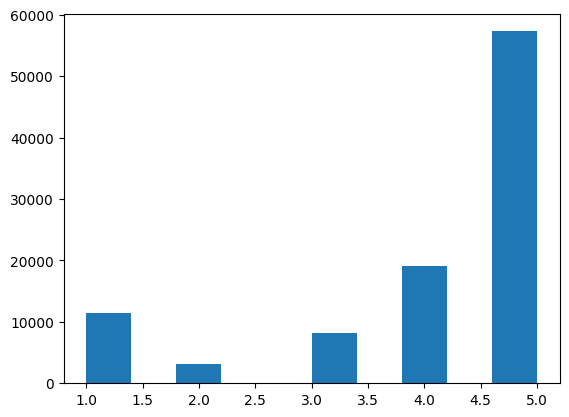

In [ ]:
plt.hist(order_reviews['review_score'])

### Customer review analysis based on the amount of payment

In [ ]:
payment_review=pd.merge(order_reviews,orders,on='order_id')
payment_review=pd.merge(payment_review,order_payments,on='order_id')

In [ ]:
payment_review.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-02-02 00:00:00,1,credit_card,8,397.26
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-03-14 00:00:00,1,credit_card,1,88.09
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-03-09 00:00:00,1,credit_card,1,194.12
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-05-10 00:00:00,1,credit_card,1,222.84
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-03-09 00:00:00,1,credit_card,10,1333.25


In [ ]:
grp=payment_review['review_score'].groupby(pd.cut(payment_review['payment_value'],1000))

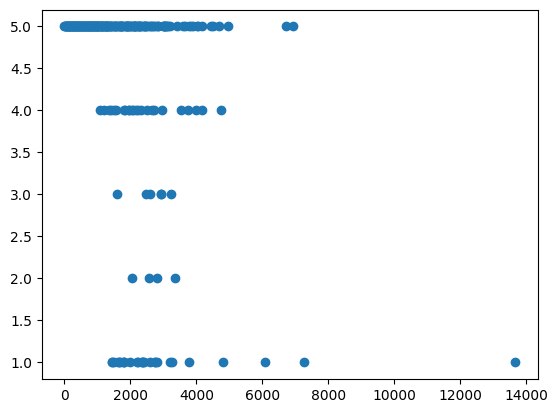

In [ ]:
x=[]
y=[]
    
for label,member in grp:
    try:
        y.append(member.value_counts().idxmax())
        x.append(label.mid)
    except :
        pass
    
plt.scatter(x,y)
    

### Customer city to review analysis

In [ ]:
cus_review=pd.merge(order_reviews,orders,on='order_id')
cus_review=pd.merge(cus_review,customers,on='customer_id')

In [ ]:
grp=cus_review['review_score'].groupby(cus_review['customer_state'])

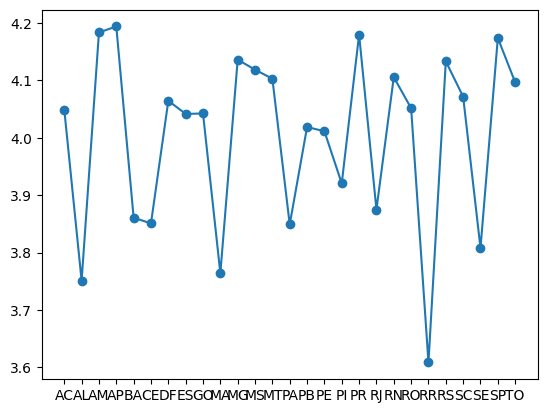

In [ ]:
x=[]
y=[]
for label,member in grp:
    x.append(label)
    
    y.append((member.value_counts()*member.value_counts().index).sum()/member.value_counts().sum())

    
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

### Low score Seller

In [ ]:
seller_review=pd.merge(order_reviews,orders,on='order_id')
seller_review=pd.merge(seller_review,order_items,on='order_id')
seller_review=pd.merge(seller_review,sellers,on='seller_id')

In [ ]:
seller_review.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-02-02 00:00:00,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.0,13.63,14600,sao joaquim da barra,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-02-02 00:00:00,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.0,13.63,14600,sao joaquim da barra,SP
2,5fdb2ed7aa0f1b1c9642175b302e38af,b0bc656fed47584c160f8cff2d7b8bbd,5,2018-03-17 00:00:00,2018-03-17 17:36:27,f4ad1c9eb0bed4469cbe0ff8f47bf634,delivered,2018-02-27 13:56:12,2018-03-23 00:00:00,1,1acb18fc869c5489d5f76abcd681165e,6d803cb79cc31c41c4c789a75933b3c7,2018-03-06 14:10:22,135.0,18.20,14600,sao joaquim da barra,SP
3,5fdb2ed7aa0f1b1c9642175b302e38af,b0bc656fed47584c160f8cff2d7b8bbd,5,2018-03-17 00:00:00,2018-03-17 17:36:27,f4ad1c9eb0bed4469cbe0ff8f47bf634,delivered,2018-02-27 13:56:12,2018-03-23 00:00:00,2,1acb18fc869c5489d5f76abcd681165e,6d803cb79cc31c41c4c789a75933b3c7,2018-03-06 14:10:22,135.0,18.20,14600,sao joaquim da barra,SP
4,a085ad47c649d76e19a93be48169ef41,52b39f7d5f670b983cae0ae2607bb1bc,5,2017-08-02 00:00:00,2017-08-05 03:19:43,a03a696301e1946f58f689501c6dc81f,delivered,2017-07-26 21:15:04,2017-08-16 00:00:00,1,45faac1ea8c173bb8c3e6cf23f5aac4e,6d803cb79cc31c41c4c789a75933b3c7,2017-08-02 21:25:25,39.9,12.69,14600,sao joaquim da barra,SP


In [ ]:
grp=seller_review['review_score'].groupby(seller_review['seller_id'])

In [ ]:
low_score=[]
for label,member in grp:
    x=label
    
    y=(member.value_counts()*member.value_counts().index).sum()/member.value_counts().sum()
    
    if(y<2):
        low_score.append([x,y])

    
low_score

[['001e6ad469a905060d959994f1b41e4f', 1.0],
 ['010da0602d7774602cd1b3f5fb7b709e', 1.0],
 ['0aa124728afc1131dff5655f4c6f487b', 1.0],
 ['1444c08e64d55fb3c25f0f09c07ffcf2', 1.0],
 ['154bdf805377afea75a3bd158e9eab10', 1.0],
 ['15ac3c501e2599e4917316fde5c5669a', 1.0],
 ['15aec03fe4cf30dfa574cf550f5ff5ff', 1.0],
 ['15b3b1b81484422eb41df68ac87f1f50', 1.0],
 ['17adeba047385fb0c67d8e90b4296d21', 1.0],
 ['19484c79cef6c062cb177aa4ef2fcc3c', 1.0],
 ['1967a9e2ad6f51802b093147d861df58', 1.0],
 ['1992f8fb6b19fcccd97ca819811e7267', 1.0],
 ['1b4b28463457a256e9a784ebe2a8f630', 1.0],
 ['1e47d8b6546eb3a77b1acddcc9406242', 1.0],
 ['1f7dfad2cb384ea4d2d7e1ffbd78c407', 1.0],
 ['1fa2d3def6adfa70e58c276bb64fe5bb', 1.0],
 ['1fbe10c70e30765ed1de86d9f7e98409', 1.5],
 ['1fddcb7b326905d3ad5efe82187db347', 1.0],
 ['20fd2d2080ed85fa67fad3fcbb2c1813', 1.0],
 ['244b04680fdbded0acf5aebd9c92b44a', 1.0],
 ['278b6e0b20c4f61fefaa0577943d7a35', 1.0],
 ['2a50b7ee5aebecc6fd0ff9784a4747d6', 1.0],
 ['2ec6e37d992a95eaddb3369dcbcc7

### Product analysis